In [1]:
import pandas as pd
import matplotlib.pyplot as plt

excel_file = pd.ExcelFile("DFs-MRV-Limpo.xlsx", engine="openpyxl")

BP = pd.read_excel(excel_file, "BP")
DFC = pd.read_excel(excel_file, "DFC")
DRE = pd.read_excel(excel_file, "DRE")

In [2]:
BP.dropna(how='all', axis='columns', inplace=True)
BP.head(3)

,MRV ON (R$ em milhares),2016,2017,2018,2019,2020
0,Ativo Total,12327013,14558500,13636891,14686323,18062015
1,Ativo Circulante,7120084,8315552,7861258,7801154,8564095
2,Caixa e Equivalentes,1763552,713123,794852,674919,1080705


In [3]:
DFC.dropna(how='all', axis='columns', inplace=True)
DFC.head(3)

,MRV ON (R$ em milhares),2017,2018,2019,2020
0,(+) Caixa Gerado por Operações,332400,625606,-98245,689934
1,Caixa Gerado nas Operações,1053428,1275794,1282107,1237169
2,Lucro Líquido,700024,758137,747876,620992


In [4]:
DRE.dropna(how='all', axis='columns', inplace=True)
DRE.head(3)

,MRV ON (R$ em milhares),2017,2018,2019,2020
0,(+) Receita Líquida Operacional,4759888,5418995,6055722,6646359
1,(-) Custo dos Produtos Vendidos,3147749,3620489,4213455,4772021
2,(=) Lucro Bruto,1612139,1798506,1842267,1874338


In [5]:
def getValue(df, nome_coluna_principal, ano, coluna_principal="MRV ON (R$ em milhares)"):
    return df[df[coluna_principal] == nome_coluna_principal][ano].values[0]

In [6]:
getValue(BP, 'Ativo Total', 2018)

13636891

In [7]:
getValue(DRE, '(=) Lucro Bruto', 2019)

1842267

In [8]:
getValue(DFC, 'Lucro Líquido', 2018)

758137

<img src="indices.jpg" alt="indices" style="width: 500px;"/>

Essa fórmula de liquidez imediata é a fórmula da liquidez seca... Verificar com o professor 

2016
	 Liquidez Corrente: 2.4347503162231448
	 Liquidez Seca:     1.3826448804678222
	 Índice de Caixa:   0.6030559175532142
2017
	 Liquidez Corrente: 2.5586471301361855
	 Liquidez Seca:     1.5168662576385086
	 Índice de Caixa:   0.21942381183884208
2018
	 Liquidez Corrente: 2.9763366099347546
	 Liquidez Seca:     1.5556847450812172
	 Índice de Caixa:   0.3009374717227013
2019
	 Liquidez Corrente: 2.780055977768544
	 Liquidez Seca:     1.3689426017617246
	 Índice de Caixa:   0.24051731326667414
2020
	 Liquidez Corrente: 2.368513555745462
	 Liquidez Seca:     1.3338137236193273
	 Índice de Caixa:   0.2988832377807462


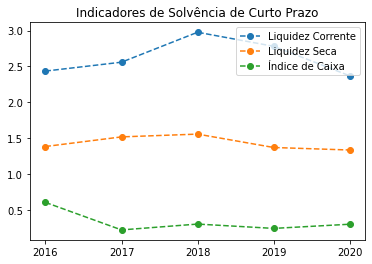

In [9]:
# Indicadores de solvência de curto prazo:
years = [2016, 2017, 2018, 2019, 2020]

liquidezCorrente = []
liquidezSeca = []
indiceDeCaixa = []

for i in years:
    ativoCirculante = getValue(BP, 'Ativo Circulante', i)
    passivoCirculante = getValue(BP, 'Passivo Circulante', i)
    estoques = getValue(BP, 'Estoques', i)
    caixa = getValue(BP, 'Caixa e Equivalentes', i)
    
    liquidezCorrente_ = ativoCirculante/passivoCirculante
    liquidezSeca_ = (ativoCirculante - estoques)/passivoCirculante
    indiceDeCaixa_ = caixa/passivoCirculante
    
    liquidezCorrente.append(liquidezCorrente_)
    liquidezSeca.append(liquidezSeca_)
    indiceDeCaixa.append(indiceDeCaixa_)
    
for i in range(len(years)):
    print(years[i])
    print(f"\t Liquidez Corrente: {liquidezCorrente[i]}")
    print(f"\t Liquidez Seca:     {liquidezSeca[i]}")
    print(f"\t Índice de Caixa:   {indiceDeCaixa[i]}")
    
plt.plot(years, liquidezCorrente, 'o--', label="Liquidez Corrente")
plt.plot(years, liquidezSeca, 'o--', label="Liquidez Seca")
plt.plot(years, indiceDeCaixa, 'o--', label="Índice de Caixa")
plt.xticks(years)
plt.title("Indicadores de Solvência de Curto Prazo")
plt.legend()
plt.show()

In [10]:
# Indicadores de solvência de longo prazo:
years = [2017, 2018, 2019, 2020]

endividamentoTotal = []
dividaPorCapitalProprio = []
multPatrimonioLiq = []
coberturaJuros = []
coberturaCaixa = []

for i in years:
    ativoTotal = getValue(BP, 'Ativo Total', i)
    patrimonioLiquido = getValue(BP, 'Patrimônio Líquido Consolidado', i)
    # dividaTotal = getValue(BP, '???', i)
    lajir = getValue(DRE, '(=) LAJIR', i)
    # lajida = ??? cade a depreciacao  
    juros = getValue(DRE, '(-) Despesas Financeiras', i)
    
    endividamentoTotal_ = (ativoTotal - patrimonioLiquido)/ativoTotal
    # dividaPorCapitalProprio_ = dividaTotal/patrimonioLiquido
    multPatrimonioLiq_ = ativoTotal/patrimonioLiquido
    coberturaJuros_ = lajir/juros
    # coberturaCaixa_ = lajida/juros
    
    endividamentoTotal.append(endividamentoTotal_)
    # dividaPorCapitalProprio.append(dividaPorCapitalProprio_)
    multPatrimonioLiq.append(multPatrimonioLiq_)
    coberturaJuros.append(coberturaJuros)
    # coberturaCaixa.append(coberturaCaixa_)
    
for i in range(len(years)):
    print(years[i])
    print(f"\t Endividamento Total:                 {endividamentoTotal[i]}")
    # print(f"\t Dívida/Capital Próprio:              {dividaPorCapitalProprio[i]}")
    print(f"\t Multiplicador do Patrimônio Líquido: {multPatrimonioLiq[i]}")
    print(f"\t Cobertura de Juros:                  {coberturaJuros[i]}")
    # print(f"\t Cobertura de Caixa:                  {coberturaCaixa[i]}")

# plotar graficos
# plt.plot(years, liquidezCorrente, 'o--', label="Liquidez Corrente")
# plt.xticks(years)
# plt.title("Indicadores de Solvência de Curto Prazo")
# plt.legend()
# plt.show()

2017
	 Endividamento Total:                 0.6018050623347185
	 Multiplicador do Patrimônio Líquido: 2.5113327805301977
	 Cobertura de Juros:                  [[...], [...], [...], [...]]
2018
	 Endividamento Total:                 0.6425441840079238
	 Multiplicador do Patrimônio Líquido: 2.7975485507897493
	 Cobertura de Juros:                  [[...], [...], [...], [...]]
2019
	 Endividamento Total:                 0.6521396812530952
	 Multiplicador do Patrimônio Líquido: 2.8747170807015126
	 Cobertura de Juros:                  [[...], [...], [...], [...]]
2020
	 Endividamento Total:                 0.6658963576323018
	 Multiplicador do Patrimônio Líquido: 2.993083202904591
	 Cobertura de Juros:                  [[...], [...], [...], [...]]


In [11]:
# Indicadores de gestão de ativos ou de giro:
years = [2017, 2018, 2019, 2020]

giroEstoque = []
PME = []
giroContasAReceber = []
PMR = []
giroAtivoTotal = []

for i in years:
    CMV = getValue(DRE, '(-) Custo dos Produtos Vendidos', i)
    estoque = getValue(BP, 'Estoques', i)
    
    giroEstoque_ = CMV/estoque
    PME_ = 365/giroEstoque_
    
    vendas = getValue(DRE, '(+) Receita Líquida Operacional', i)
    contasAReceber = getValue(BP, 'Contas a Receber', i)
    giroContasAReceber_ = vendas/contasAReceber
    
    PMR_ = 365/giroContasAReceber_
    
    ativoTotal = getValue(BP, 'Ativo Total', i)
    giroAtivoTotal_ = vendas/ativoTotal
    
    giroEstoque.append(giroEstoque_)
    PME.append(PME_)
    giroContasAReceber.append(giroContasAReceber_)
    PMR.append(PMR_)
    giroAtivoTotal.append(giroAtivoTotal_)
    
for i in range(len(years)):
    print(years[i])
    print(f"\t Giro do Estoque:            {giroEstoque[i]}")
    print(f"\t Prazo Médio de Estocagem:   {PME[i]}")
    print(f"\t Giro de Contas a Receber:   {giroContasAReceber[i]}")
    print(f"\t Prazo Médio de Recebimento: {PMR[i]}")
    print(f"\t Giro do Ativo Total:        {giroAtivoTotal[i]}")

# plotar graficos
# plt.plot(years, liquidezCorrente, 'o--', label="Liquidez Corrente")
# plt.xticks(years)
# plt.title("Indicadores de Solvência de Curto Prazo")
# plt.legend()
# plt.show()

2017
	 Giro do Estoque:            0.9297004194322882
	 Prazo Médio de Estocagem:   392.59958624401116
	 Giro de Contas a Receber:   2.986034315109313
	 Prazo Médio de Recebimento: 122.23570176441126
	 Giro do Ativo Total:        0.32694906755503655
2018
	 Giro do Estoque:            0.9648716880655364
	 Prazo Médio de Estocagem:   378.28864139623124
	 Giro de Contas a Receber:   3.7176752673860993
	 Prazo Médio de Recebimento: 98.17963478467871
	 Giro do Ativo Total:        0.397377598750331
2019
	 Giro do Estoque:            1.0640723076864798
	 Prazo Médio de Estocagem:   343.0218015856346
	 Giro de Contas a Receber:   3.8907844698145175
	 Prazo Médio de Recebimento: 93.81141588071578
	 Giro do Ativo Total:        0.4123375197454121
2020
	 Giro do Estoque:            1.2755055892665554
	 Prazo Médio de Estocagem:   286.1610353349241
	 Giro de Contas a Receber:   3.604664116167396
	 Prazo Médio de Recebimento: 101.25770064481921
	 Giro do Ativo Total:        0.36797439266881354


In [12]:
# Indicadores de lucratividade:
years = [2017, 2018, 2019, 2020]

margemBruta = []
margemLAJIDA = []
margemLiquida = []
ROA = []
ROE = []

for i in years:
    
    vendas = getValue(DRE, '(+) Receita Líquida Operacional', i)
    lucroBruto = getValue(DRE, '(=) Lucro Bruto', i)
    
    margemBruta_ = lucroBruto/vendas
    
    # lajida ...
    
    # margemLAJIDA_ = lajida/vendas
    
    lucroLiquido = getValue(DRE, '(=) Lucro Líquido', i)
    
    margemLiquida_ = lucroLiquido/vendas
    
    ativoTotal = getValue(BP, 'Ativo Total', i)
    ROA_ = lucroLiquido/ativoTotal
    
    patrimonioLiquido = getValue(BP, 'Patrimônio Líquido Consolidado', i)
    ROE_ = lucroLiquido/patrimonioLiquido
    
    margemBruta.append(margemBruta_)
    # margemLAJIDA.append(margemLAJIDA_)
    margemLiquida.append(margemLiquida_)
    ROA.append(ROA_)
    ROE.append(ROE_)
    
for i in range(len(years)):
    print(years[i])
    print(f"\t Mergem Bruta:                       {margemBruta[i]}")
    # print(f"\t Margem LAJIDA:                      {margemLAJIDA[i]}")
    print(f"\t Margem Líquida:                     {margemLiquida[i]}")
    print(f"\t Retorno sobre o Ativo:              {ROA[i]}")
    print(f"\t Retorno sobre o Patrimônio Líquido: {giroAtivoTotal[i]}")

# plotar graficos
# plt.plot(years, liquidezCorrente, 'o--', label="Liquidez Corrente")
# plt.xticks(years)
# plt.title("Indicadores de Solvência de Curto Prazo")
# plt.legend()
# plt.show()

2017
	 Mergem Bruta:                       0.3386926331039722
	 Margem Líquida:                     0.147067325953888
	 Retorno sobre o Ativo:              0.04808352508843631
	 Retorno sobre o Patrimônio Líquido: 0.32694906755503655
2018
	 Mergem Bruta:                       0.33188921562023954
	 Margem Líquida:                     0.13990361681455693
	 Retorno sobre o Ativo:              0.05559456330625507
	 Retorno sobre o Patrimônio Líquido: 0.397377598750331
2019
	 Mergem Bruta:                       0.30421921613971054
	 Margem Líquida:                     0.12349906419085949
	 Retorno sobre o Ativo:              0.050923297819338444
	 Retorno sobre o Patrimônio Líquido: 0.4123375197454121
2020
	 Mergem Bruta:                       0.28200974398162965
	 Margem Líquida:                     0.09343341218853811
	 Retorno sobre o Ativo:              0.034381103105052234
	 Retorno sobre o Patrimônio Líquido: 0.36797439266881354


In [13]:
# Medidas de Valor de Mercado:
# years = [2017, 2018, 2019, 2020]

# precoLucro = []
# mercadoContabil = []

# for i in years:
    
#     precoPorAcao = ??
#     lucroPorAcao = ??
#     precoLucro_ = precoPorAcao/lucroPorAcao
    
#     valorMercadoPorAcao = ??
#     valorContabilPorAcao = ??
#     mercadoContabil_ = valorMercadoPorAcao/valorContabilPorAcao
    
#     precoLucro.append(precoLucro_)
#     mercadoContabil.append(mercadoContabil_)
    
# for i in range(len(years)):
#     print(years[i])
#     print(f"\t Índice preço/lucro:                     {precoLucro[i]}")
#     print(f"\t Índice Valor de Mercado/Valor Contábil: {margemLAJIDA[i]}")

# plotar graficos
# plt.plot(years, liquidezCorrente, 'o--', label="Liquidez Corrente")
# plt.xticks(years)
# plt.title("Indicadores de Solvência de Curto Prazo")
# plt.legend()
# plt.show()